In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import plotly
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
% matplotlib inline

## Reading and Cleaning Data

In [2]:
df_ratings = pd.read_csv('RT_vs_IMDb3.csv')

In [3]:
df_ratings.head(2)

,@,Difference,Avg0,Icon,Fresh,MaxScore,FilmName+Year,Size,Certified Fresh,Check Netflix,...,Movie Name,Number of Records,Rt Url,Time Period,Release Year,Search Tastedive,score,scorer,X',Y'
0,0.785398,100,0,AUDIENCE FRESH,60,100,'Round Midnight (1986),1,0,https://www.netflix.com/search?q='Round%20Midn...,...,'Round Midnight,1,https://www.rottentomatoes.com/m/round_midnight,1985,1986,https://tastedive.com/movies/like/'Round-Midnight,89,audience,-7.778175,133.643182
1,0.785398,100,0,CRITIC FRESH,60,100,'Round Midnight (1986),1,0,https://www.netflix.com/search?q='Round%20Midn...,...,'Round Midnight,1,https://www.rottentomatoes.com/m/round_midnight,1985,1986,https://tastedive.com/movies/like/'Round-Midnight,100,critic,-7.778175,133.643182
2,0.785398,100,0,AUDIENCE ROTTEN,60,100,'Til There Was You (1997),1,0,https://www.netflix.com/search?q='Til%20There%...,...,'Til There Was You,1,https://www.rottentomatoes.com/m/til_there_was...,1995,1997,https://tastedive.com/movies/like/'Til-There-W...,34,audience,20.506097,27.577164
3,0.785398,100,0,CRITIC ROTTEN,60,100,'Til There Was You (1997),1,0,https://www.netflix.com/search?q='Til%20There%...,...,'Til There Was You,1,https://www.rottentomatoes.com/m/til_there_was...,1995,1997,https://tastedive.com/movies/like/'Til-There-W...,5,critic,20.506097,27.577164
4,0.785398,100,0,AUDIENCE FRESH,60,100,*batteries not included (1987),1,0,https://www.netflix.com/search?q=*batteries%20...,...,*batteries not included,1,https://www.rottentomatoes.com/m/batteries_not...,1985,1987,https://tastedive.com/movies/like/*batteries-n...,64,audience,2.828427,87.681241


In [4]:
df_ratings.columns = map(str.lower, df_ratings)

## Drop Columns that are not required

In [5]:
df_ratings.drop(columns=['@', 'difference', 'avg0', 'fresh', 'size', 'number of records', 'check netflix','check prime',
                         'concat recommendedfilm','film description','fulldescription', 'imdb url','rt url','search tastedive',
                         'x\'','y\'','filmname+year'], inplace=True)

## Remove Duplicates

In [6]:
df_ratings.drop_duplicates(inplace = True)

In [7]:
df_ratings.head(5)

,icon,maxscore,certified fresh,fresh/rotten,genre(s),imdb score,likes,movie id,movie name,time period,release year,score,scorer
0,AUDIENCE FRESH,100,0,fresh,"Drama,Music",74,NaN,1,'Round Midnight,1985,1986,89,audience
1,CRITIC FRESH,100,0,fresh,"Drama,Music",74,NaN,1,'Round Midnight,1985,1986,100,critic
2,AUDIENCE ROTTEN,100,0,rotten,"Romance,Comedy",48,NaN,2,'Til There Was You,1995,1997,34,audience
3,CRITIC ROTTEN,100,0,rotten,"Romance,Comedy",48,NaN,2,'Til There Was You,1995,1997,5,critic
4,AUDIENCE FRESH,100,0,fresh,"Comedy,Family,Fantasy",66,NaN,3,*batteries not included,1985,1987,64,audience


In [195]:
df_ratings.to_csv("Imdb_vs_Rotten_Tomatoes_Clean.csv")

## Analysis 1:  <br> Comparison between the ratings from RT and IMDB over time.

In [32]:
df_mean_scores = df_ratings.groupby('release year')[['imdb score', 'score']].mean().reset_index()
df_mean_scores['imdb score'] = df_mean_scores['imdb score'].round(2)
df_mean_scores['score'] = df_mean_scores['score'].round(2)

In [51]:
init_notebook_mode(connected=True)
Imdb_mean_scores = go.Scatter(x=df_mean_scores['release year'], y=df_mean_scores['imdb score'], line=dict(width=4), 
                    text=df_mean_scores['imdb score'], hoverinfo='text', mode='lines', opacity=1, showlegend=True, 
                             name = 'IMDB_mean_score')
RT_mean_scores = go.Scatter(x=df_mean_scores['release year'], y=df_mean_scores['score'], line=dict(width=4), 
                    text=df_mean_scores['score'], hoverinfo='text', mode='lines', opacity=1, showlegend=True, 
                           name = 'RT_mean_score')
layout1 = go.Layout(
        title='Comparison of IMDB and RT Mean Scores for Movies Over Time', titlefont=dict(family='Arial', size=30, color ='#00008B'),
    xaxis=dict(title='Release Years', titlefont=dict(size=25, color = '#00008B'), showticklabels=True, tickfont=dict(size=20, color='#00008B')),
    yaxis=dict(title='Mean Scores', titlefont=dict(size=25, color = '#00008B'), showticklabels=True,
                 tickfont=dict(size=20, color='#00008B')),
    margin=dict(autoexpand=False, l=100, r=30, t=100))
fig1 = go.Figure(data=[Imdb_mean_scores, RT_mean_scores], layout=layout1)
plotly.offline.iplot(fig1)

In [157]:
df_mean_scores = df_ratings.groupby('time period')[['imdb score', 'score']].mean().reset_index()
df_mean_scores['imdb score'] = df_mean_scores['imdb score'].round(2)
df_mean_scores['score'] = df_mean_scores['score'].round(2)

In [170]:
init_notebook_mode(connected=True)
Imdb_mean_scores = go.Box(x=df_ratings['time period'], y=df_ratings['imdb score'], name = 'IMDB_score')
RT_mean_scores = go.Scatter(x=df_mean_scores['time period'], y=df_mean_scores['score'], line=dict(width=4), 
                    text=df_mean_scores['score'], hoverinfo='text', mode='lines+markers', marker = dict(size = 10, color = 'red'), 
                            opacity=1, showlegend=True, name = 'RT_mean_score')
layout1 = go.Layout(
        title='Comparison of IMDB and RT Mean Scores for Movies Over Time', 
               titlefont=dict(family='Arial', size=30, color ='#00008B'),
    xaxis=dict(title='Time Period(Years)', titlefont=dict(size=25, color = '#00008B'), showticklabels=True, tickfont=dict(size=20, color='#00008B')),
    yaxis=dict(title='Mean Scores', titlefont=dict(size=25, color = '#00008B'), showticklabels=True,
                 tickfont=dict(size=20, color='#00008B')),
    margin=dict(autoexpand=False, l=100, r=30, t=100))
fig1 = go.Figure(data=[Imdb_mean_scores, RT_mean_scores], layout=layout1)
plotly.offline.iplot(fig1)

Mean scores from rotten tomatoes is less than the mean scores from imdb per year for almost all of the years. Was it possible that the rotten tomatoes maximum score is also lesser than the maximum scores from imdb? The next part analyzes the two ratings mechanisms' maximum and minimum scores. 

In [10]:
df_max_scores = df_ratings.groupby('release year')[['imdb score','score']].max().reset_index()

In [11]:
df_min_scores = df_ratings.groupby('release year')[['imdb score', 'score']].min().reset_index()

In [108]:
init_notebook_mode(connected=True)
trace0 = go.Scatter(x=df_max_scores['release year'], y=df_max_scores['imdb score'], line=dict(width=4, color = '#00FFFF'), 
                    text=df_max_scores['imdb score'], hoverinfo='text', mode='lines', opacity=1, showlegend=True, 
                             name = 'IMDB_max_score')
trace1 = go.Scatter(x=df_max_scores['release year'], y=df_max_scores['score'], line=dict(width=4), 
                    text=df_max_scores['score'], hoverinfo='text', mode='lines', opacity=1, showlegend=True, 
                           name = 'RT_max_score')
trace2 = go.Scatter(x=df_min_scores['release year'], y=df_min_scores['score'], line=dict(width=4, color = '#E9967A'), 
                    text=df_min_scores['score'], hoverinfo='text', mode='lines', opacity=1, showlegend=True, 
                           name = 'RT_min_score')
trace3 = go.Scatter(x=df_min_scores['release year'], y=df_min_scores['imdb score'], line=dict(width=4, color = '#6495ED'), 
                    text=df_min_scores['imdb score'], hoverinfo='text', mode='lines', opacity=1, showlegend=True, 
                           name = 'IMDB_min_score')
updatemenus = list([dict(active=-1, buttons=list([   
            dict(label='Maximum', method='update',
                 args = [{'visible': [True, True,False,False]}, {'title': 'Maximum Scores for IMDB and RT Over the Years', 
                                                      'titlefont': dict(size=22, color='#00008B')}]),
            dict(label='Minimum', method='update',
                 args = [{'visible': [False, False, True, True]}, {'title': 'Minimum Scores for IMDB and RT Over the Years', 
                                                      'titlefont': dict(size=22, color='#00008B')}]), 
            dict(label='Both', method='update',
                 args = [{'visible': [True, True, True, True]}, 
                         {'title': 'Comparison of IMDB and RT Minimum/Maximum Scores for Movies Over Time', 
                         'titlefont': dict(size=22, color='#00008B')}])]),
            direction = 'down', pad = {'r': 10, 't': 10}, showactive = True, x = 0.1, xanchor = 'left', y = 1.1, 
                         yanchor = 'top', bordercolor = 'red', bgcolor = '#C2C2C2')])
layout1 = go.Layout(
         title='Comparison of IMDB and RT Maximum/Minimum Scores for Movies Over Time', titlefont=dict(family='Arial', 
                                                                                            size=28, color ='#00008B'),
         xaxis=dict(title='Release Years', titlefont=dict(size=25, color = '#00008B'), showticklabels=True, 
                    tickfont=dict(size=20, color='#00008B')),
         yaxis=dict(title='Mean Scores', titlefont=dict(size=25, color = '#00008B'), showticklabels=True,
                 tickfont=dict(size=20, color='#00008B')),
         plot_bgcolor = 'black',
         legend=dict(orientation="v", x = .5, y = .6, font=dict(
            family='sans-serif',
            size=15
        )),
    margin=dict(autoexpand=False, l=80, r=30, t=100), updatemenus=updatemenus, height=500, width=1000,)
fig1 = go.Figure(data=[trace0, trace1, trace2, trace3], layout=layout1)
plotly.offline.iplot(fig1)

Rotten Tomatoes maximum and minimums over the year are more extreme than imdb's minimum/maximum. It is because the critics score is separate in rotten tomatoes than the audience score and critics have the tendency to score 0 or 100 more than the audiences. 

In [13]:
df_ratings[(df_ratings['score'] == 100) | (df_ratings['score'] == 0)]['score'].value_counts()

0      78
100    62
Name: score, dtype: int64

In [14]:
df_ratings[(df_ratings['score'] == 100) | (df_ratings['score'] == 0)].groupby('scorer')[['score']].count()

,score
scorer,
critic,140


### It can be concluded from here that the total count of movies with a score of 0 or 100 in the rotten tomatoes is 140, and all these scores are given by the critics. <br> From analysis 1, it can also be said that imdb ratings are more of an average ratings for the movies, since the mean score of imdb score only ranges between 68-62. 

## Analysis 2: <br> Do the movies with maximum score earn the most?

In [17]:
top_grossing_movies = {'Title': ['Pirates of the Caribbean: At World\'s End', 'The Dark Knight','Avatar', 'Toy Story 3',
                          'Harry Potter and the Deathly Hallows Part 2','Marvel\'s The Avengers','Frozen',
                          'Transformers: Age of Extinction','Star Wars: The Force Awakens', 'Captain America: Civil War',
                          'Star Wars: The Last Jedi'],
            'Worldwide Gross': [963420425, 1004558444, 2787965087, 1066969703, 1341511219, 1518812988, 1290000000, 1104039076, 
                               2068223624, 1153304495, 1332539889],
                  'Release Year': [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017], 
                    'Imdb Score': [71, 90, 78, 83, 81, 81, 75, 57, 80, 78, 72],
                'RT Critic Score': [45,94 , 83, 99, 81, 92, 90, 18, 93, 91, 91], 
                'RT Audience Score': [72, 94, 82, 89,  89, 91, 85, 51, 87, 89, 46], 
                'Genre(s)': ['Action,Adventure,Fantasy', 'Action,Crime,Drama', 'Action,Adventure,Fantasy', 
                             'Animation,Adventure,Comedy', 'Adventure,Drama,Fantasy', 'Action,Adventure,Sci-Fi', 
                             'Animation,Adventure,Comedy', 'Action,Adventure,Sci-Fi', 'Action,Adventure,Fantasy', 
                             'Action,Adventure,Sci-Fi', 'Action,Adventure,Fantasy']}

In [18]:
df_top_grossing_movies = pd.DataFrame(data=top_grossing_movies).infer_objects()

In [35]:
df_top_grossing_movies.head(1)

,Title,Worldwide Gross,Release Year,Imdb Score,RT Critic Score,RT Audience Score,Genre(s)
0,Pirates of the Caribbean: At World's End,963420425,2007,71,45,72,"Action,Adventure,Fantasy"


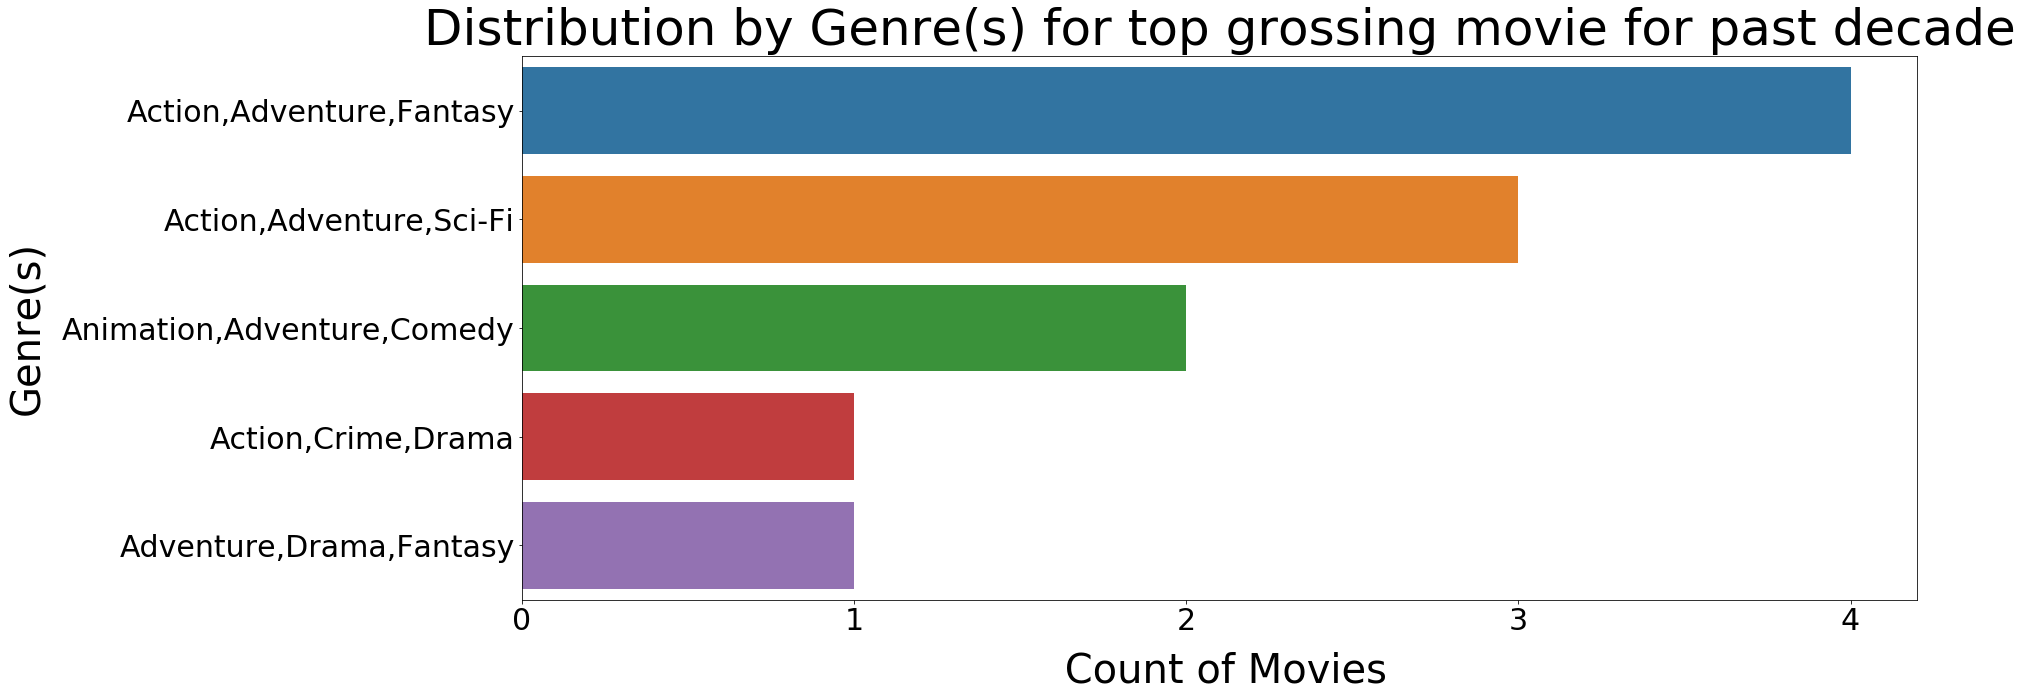

In [20]:
plt.figure(figsize=(25, 10))
xtick = [0,1,2,3,4]
sns.countplot(y='Genre(s)', data=df_top_grossing_movies, orient = 'h', order = df_top_grossing_movies['Genre(s)'].value_counts().index)
plt.title("Distribution by Genre(s) for top grossing movie for past decade", y=1.01, fontsize=50)
plt.xlabel(" Count of Movies", labelpad=15, fontsize=40)
plt.ylabel("Genre(s)", labelpad=15, fontsize=40)
plt.xticks(xtick, fontsize=30)
plt.yticks(fontsize=30);

In [182]:
df_rt_audience = df_ratings[(df_ratings['scorer'] == 'audience') & (df_ratings['release year'] > 2007)]

In [183]:
df_rt_top_score = df_rt_audience.loc[df_rt_audience.groupby('release year')['score'].idxmax()]

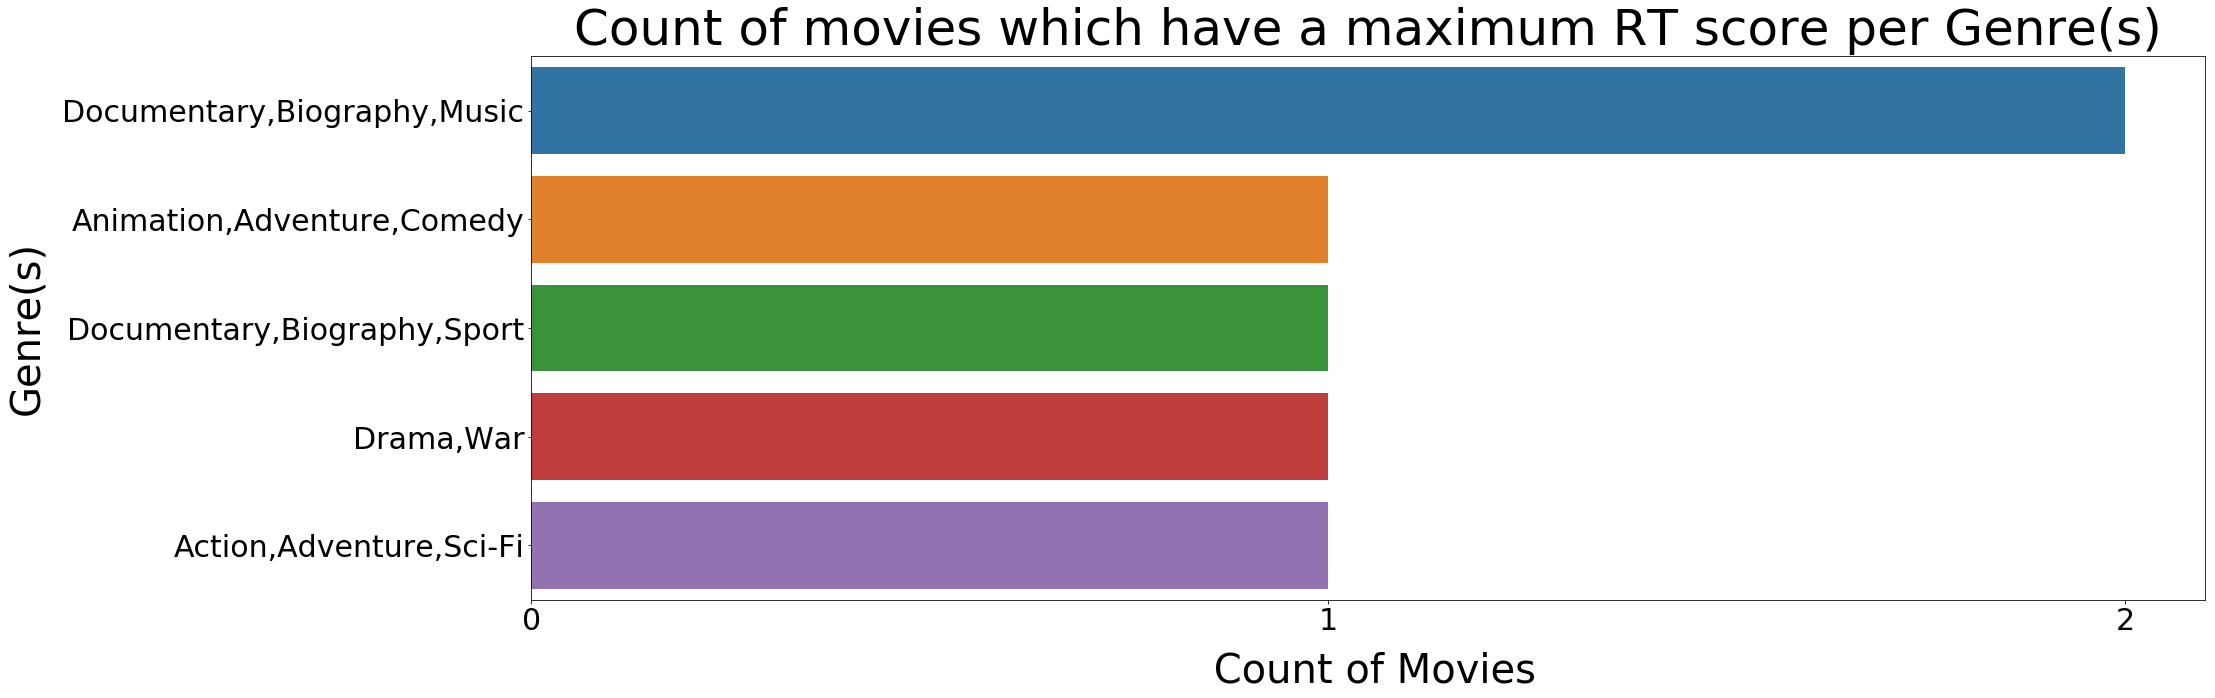

In [194]:
plt.figure(figsize=(30, 10))
xtick = [0,1,2]
sns.countplot(y='genre(s)', data=df_rt_top_score, orient = 'h',
              order = df_rt_top_score['genre(s)'].value_counts().iloc[:5].index)
plt.title("Count of movies which have a maximum RT score per Genre(s)", y=1.01, fontsize=50)
plt.xlabel(" Count of Movies", labelpad=15, fontsize=40)
plt.ylabel("Genre(s)", labelpad=15, fontsize=40)
plt.xticks(xtick, fontsize=30)
plt.yticks(fontsize=30);

The Genre(s) that are most loved by the audience in terms of earnings are not the ones that are rated the highest by the rotten tomatoes critics. Since from the Analysis 1, it was assumed that the imdb rating is closer to how the audience reacted to the movies, the next step was to establish this as the truth than just a myth.

In [21]:
df_top_score = df_ratings.loc[df_ratings.groupby('release year')['imdb score'].idxmax()]

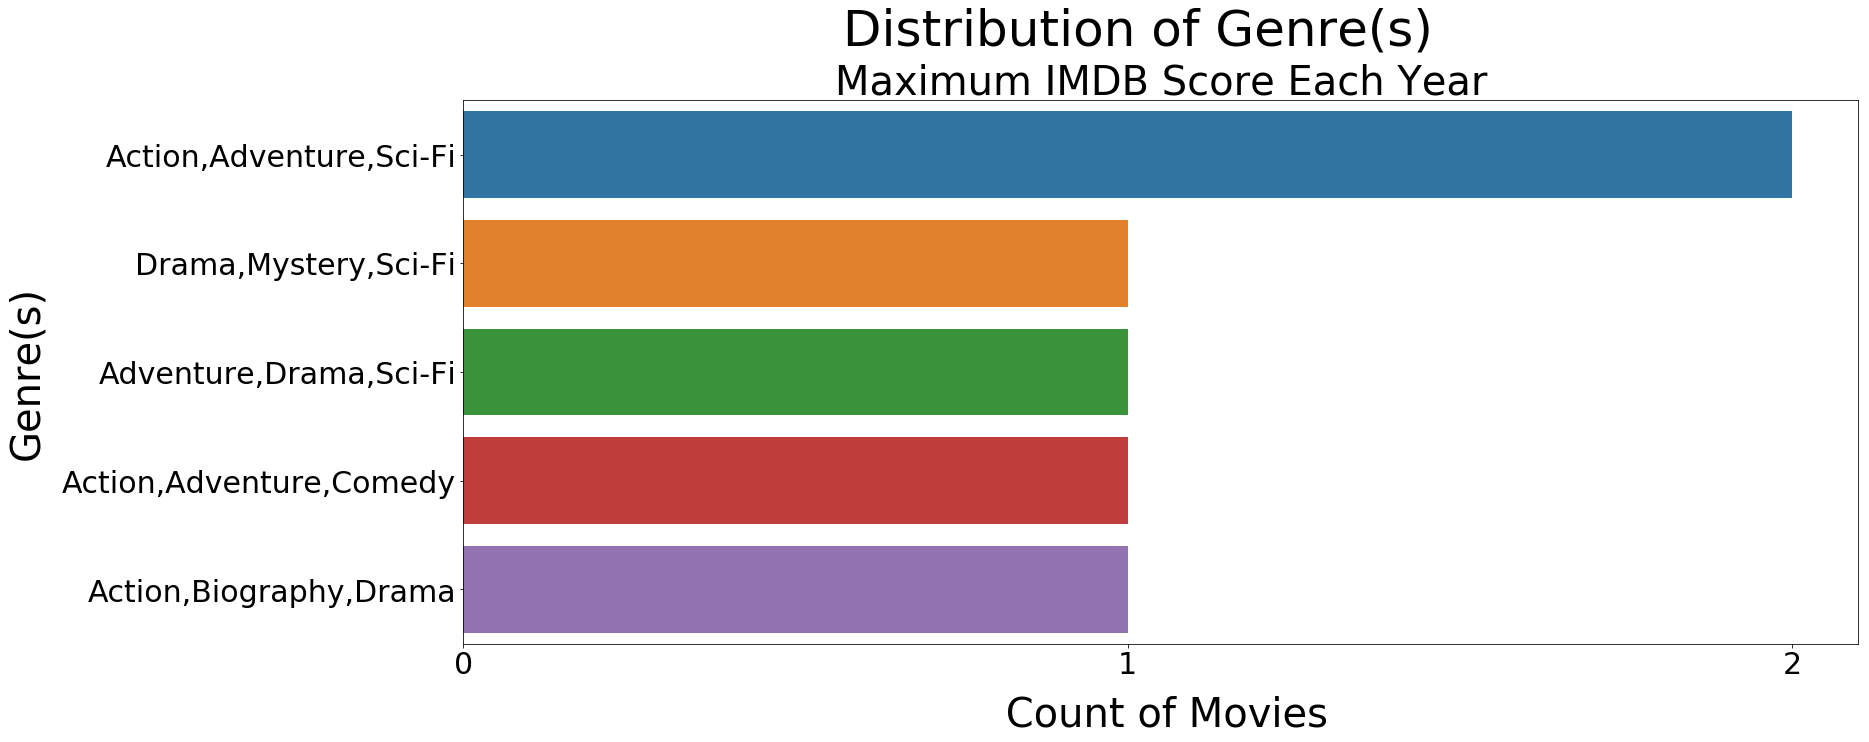

In [134]:
plt.figure(figsize=(25, 10))
xtick = [0,1,2]
sns.countplot(y='genre(s)', data=df_top_score[df_top_score['release year'] > 2007], orient = 'h',
              order = df_top_score[df_top_score['release year'] > 2007]['genre(s)'].value_counts().iloc[:5].index)
plt.suptitle("Distribution of Genre(s)", y=1.01, fontsize=50)
plt.title("Maximum IMDB Score Each Year",fontsize = 40)
plt.xlabel(" Count of Movies", labelpad=15, fontsize=40)
plt.ylabel("Genre(s)", labelpad=15, fontsize=40)
plt.xticks(xtick, fontsize=30)
plt.yticks(fontsize=30);

In [172]:
df_top_score[df_top_score['release year'] > 2007]

,icon,maxscore,certified fresh,fresh/rotten,genre(s),imdb score,likes,movie id,movie name,time period,release year,score,scorer
28886,AUDIENCE FRESH,100,1,fresh,"Action,Crime,Thriller",90,9513.0,3792,The Dark Knight,2005,2008,94,audience
14762,AUDIENCE FRESH,100,1,fresh,"Adventure,Drama,War",83,8258.0,1917,Inglourious Basterds,2005,2009,87,audience
14704,AUDIENCE FRESH,100,1,fresh,"Action,Adventure,Sci-Fi",88,15662.0,1909,Inception,2010,2010,91,audience
29856,AUDIENCE FRESH,100,1,fresh,"Biography,Comedy,Drama",86,1914.0,3909,The Intouchables,2010,2011,93,audience
8124,AUDIENCE FRESH,100,1,fresh,"Drama,Western",84,6927.0,1104,Django Unchained,2010,2012,91,audience
24084,AUDIENCE FRESH,100,1,fresh,"Action,Biography,Drama",81,942.0,3157,Rush,2010,2013,88,audience
14990,AUDIENCE FRESH,100,1,fresh,"Adventure,Drama,Sci-Fi",86,NaN,1936,Interstellar,2010,2014,85,audience
17506,AUDIENCE FRESH,100,1,fresh,"Action,Adventure,Sci-Fi",81,3414.0,2312,Mad Max: Fury Road,2015,2015,85,audience
7408,AUDIENCE FRESH,100,1,fresh,"Action,Adventure,Comedy",80,4300.0,1009,Deadpool,2015,2016,90,audience
3736,AUDIENCE FRESH,100,1,fresh,"Drama,Mystery,Sci-Fi",81,NaN,512,Blade Runner 2049,2015,2017,81,audience


In [178]:
df_only_audience = df_ratings[df_ratings['scorer'] == 'audience']

In [179]:
len(df_only_audience[df_only_audience['release year'] > 2007])

1103

In [180]:
df_top_score = df_only_audience.loc[df_only_audience.groupby('release year')['score'].idxmax()]

In [181]:
df_top_score[df_top_score['release year'] > 2007]

,icon,maxscore,certified fresh,fresh/rotten,genre(s),imdb score,likes,movie id,movie name,time period,release year,score,scorer
28886,AUDIENCE FRESH,100,1,fresh,"Action,Crime,Thriller",90,9513.0,3792,The Dark Knight,2005,2008,94,audience
27018,AUDIENCE FRESH,100,0,fresh,"Documentary,Biography,Music",78,NaN,3536,Still Bill,2005,2009,93,audience
24740,AUDIENCE FRESH,100,1,fresh,"Documentary,Biography,Sport",86,157.0,3243,Senna,2010,2010,95,audience
29856,AUDIENCE FRESH,100,1,fresh,"Biography,Comedy,Drama",86,1914.0,3909,The Intouchables,2010,2011,93,audience
24640,AUDIENCE FRESH,100,1,fresh,"Documentary,Biography,Music",82,NaN,3226,Searching for Sugar Man,2010,2012,92,audience
26334,AUDIENCE FRESH,100,1,fresh,"Documentary,Music",78,NaN,3440,Sound City,2010,2013,90,audience
12368,AUDIENCE FRESH,100,1,fresh,"Action,Adventure,Sci-Fi",81,NaN,1606,Guardians of the Galaxy,2010,2014,92,audience
2938,AUDIENCE FRESH,100,1,fresh,"Drama,War",78,NaN,404,Beasts of No Nation,2015,2015,92,audience
35134,AUDIENCE FRESH,100,1,fresh,"Animation,Adventure,Comedy",80,2478.0,4620,Zootopia,2015,2016,92,audience
11610,AUDIENCE FRESH,100,1,fresh,"Action,Crime,Drama",64,NaN,1518,Ghost in the Shell,2015,2017,89,audience


### It can be concluded that the genre(s) that earned the most in the past decade are the genre(s) that have the highest imdb score as well. <br> Conclusion: IMDB ratings give the audiences' perceptions whereas the rotten tomatoes ratings can be used to view the critic's perception about a particular movie. 

In [53]:
df_lowest_score = df_ratings.loc[df_ratings.groupby('release year')['imdb score'].idxmin()]

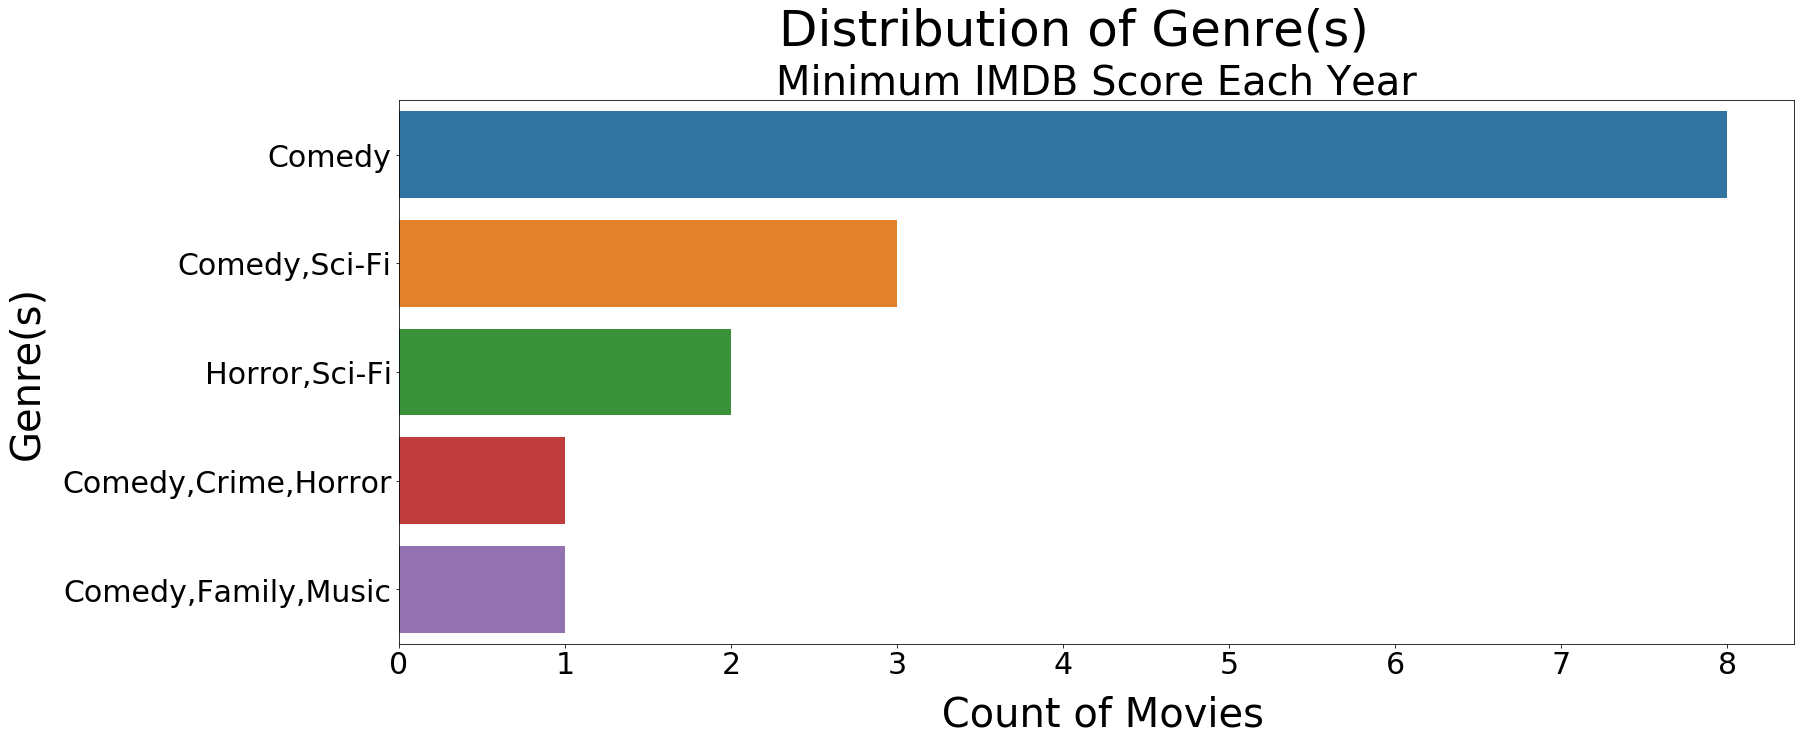

In [54]:
plt.figure(figsize=(25, 10))
sns.countplot(y='genre(s)', data=df_lowest_score, orient = 'h',
              order = df_lowest_score['genre(s)'].value_counts().iloc[:5].index)
plt.suptitle("Distribution of Genre(s)", y=1.01, fontsize=50)
plt.title("Minimum IMDB Score Each Year",fontsize = 40)
plt.xlabel(" Count of Movies", labelpad=15, fontsize=40)
plt.ylabel("Genre(s)", labelpad=15, fontsize=40)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30);

In [110]:
df_rt_lowest_score = df_ratings.loc[df_ratings.groupby('release year')['score'].idxmin()]

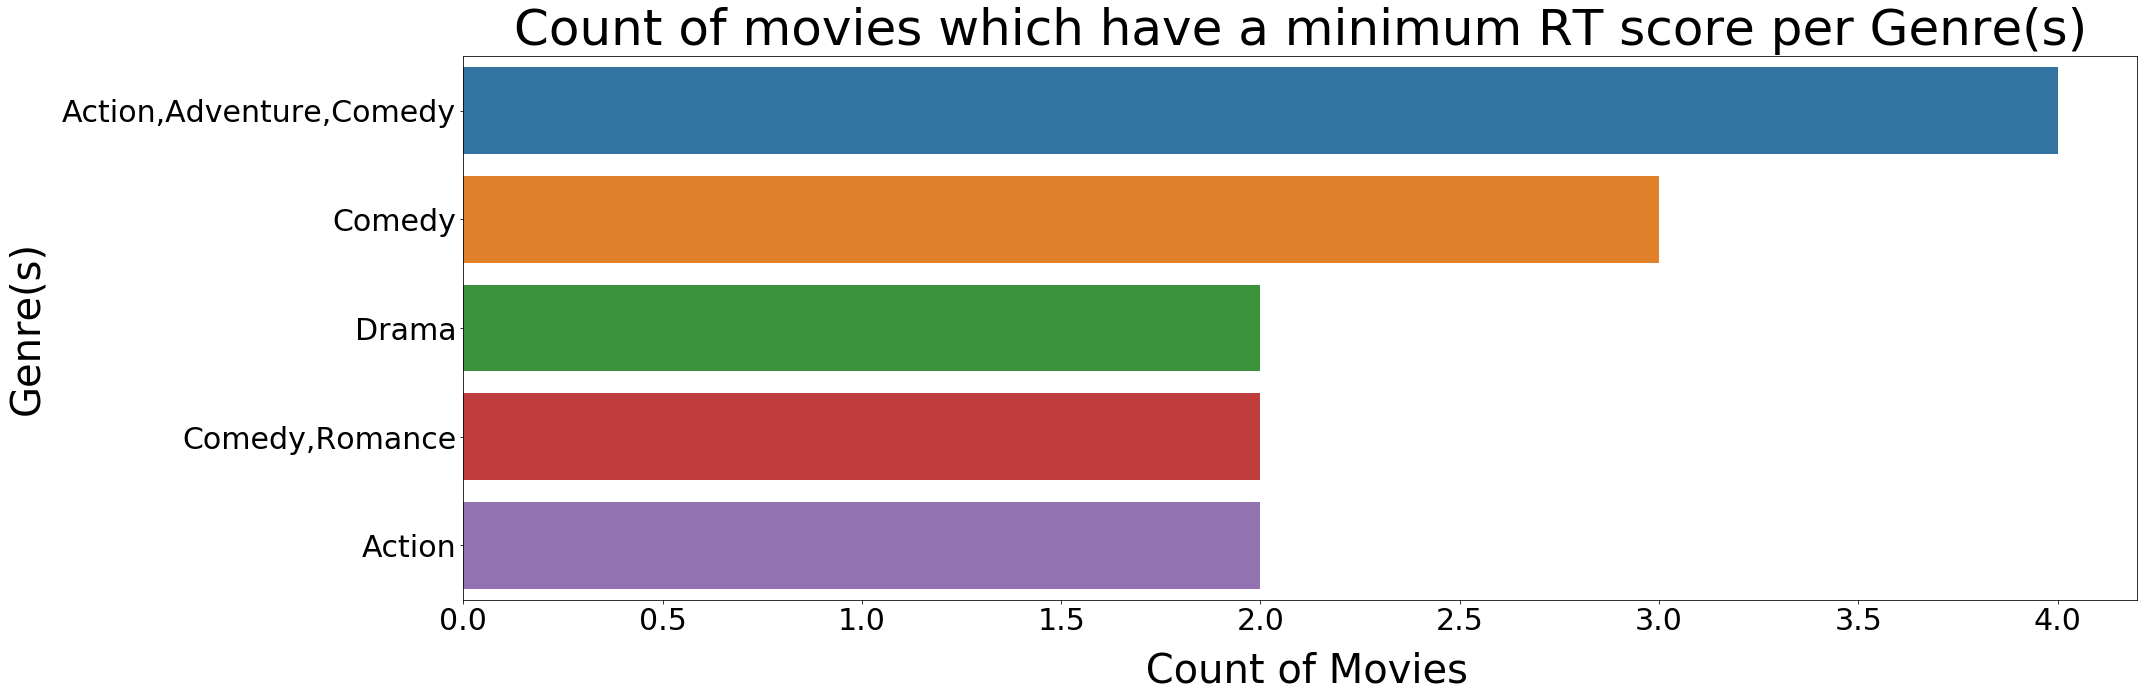

In [111]:
plt.figure(figsize=(30, 10))
sns.countplot(y='genre(s)', data=df_rt_lowest_score, orient = 'h', order = df_rt_lowest_score['genre(s)'].value_counts().iloc[:5].index)
plt.title("Count of movies which have a minimum RT score per Genre(s)", y=1.01, fontsize=50)
plt.xlabel(" Count of Movies", labelpad=15, fontsize=40)
plt.ylabel("Genre(s)", labelpad=15, fontsize=40)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30);

In [141]:
#df_rt_100_scores = df_100_score.groupby('time period')[['imdb score']].mean().reset_index()
df_rt_100_scores = df_100_score[df_100_score['release year'] > 2007].groupby('release year')[['imdb score']].mean().reset_index()
df_rt_100_scores['imdb score'] = df_rt_100_scores['imdb score'].round(2)

In [124]:
df_rt_100_score

,movie name,release year,imdb score
16355,LOL,2012,44
17871,Man on Wire,2008,78
26335,Sound City,2013,78
27019,Still Bill,2009,78
33033,Under African Skies,2012,78
34357,Wild Bill,2011,72


In [147]:
init_notebook_mode(connected=True)
trace1 = go.Scatter(x=df_rt_100_scores['release year'], y=df_rt_100_scores['imdb score'], line=dict(width=4), 
                    text=df_rt_100_scores['imdb score'], hoverinfo='text', mode='lines+markers', opacity=1, showlegend=False)
layout1 = go.Layout(
        title='IMDB Mean Scores Year for Movies with RT Score of 100 in the Last Decade', titlefont=dict(family='Arial', size=28),
    xaxis=dict(title='Release Years', titlefont=dict(size=25), showticklabels=True, tickfont=dict(size=20, color='black')),
    yaxis=dict(title='Mean Scores', titlefont=dict(size=25), showticklabels=True, 
                 tickfont=dict(size=20, color='black')),
    margin=dict(autoexpand=False, l=100, r=30, t=100))
fig1 = go.Figure(data=[trace1], layout=layout1)
plotly.offline.iplot(fig1)